<a href="https://colab.research.google.com/github/lutviabdullah/Business-Analytics/blob/main/FMCGProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FMCG Intelligence : Analysis on consumber behavior of using on personal care in south east asia

/tmp/ipython-input-3-4107537849.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_totals.values, y=country_totals.index, palette='viridis')
/tmp/ipython-input-3-4107537849.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ecommerce_Penetration', y='Country', data=df,


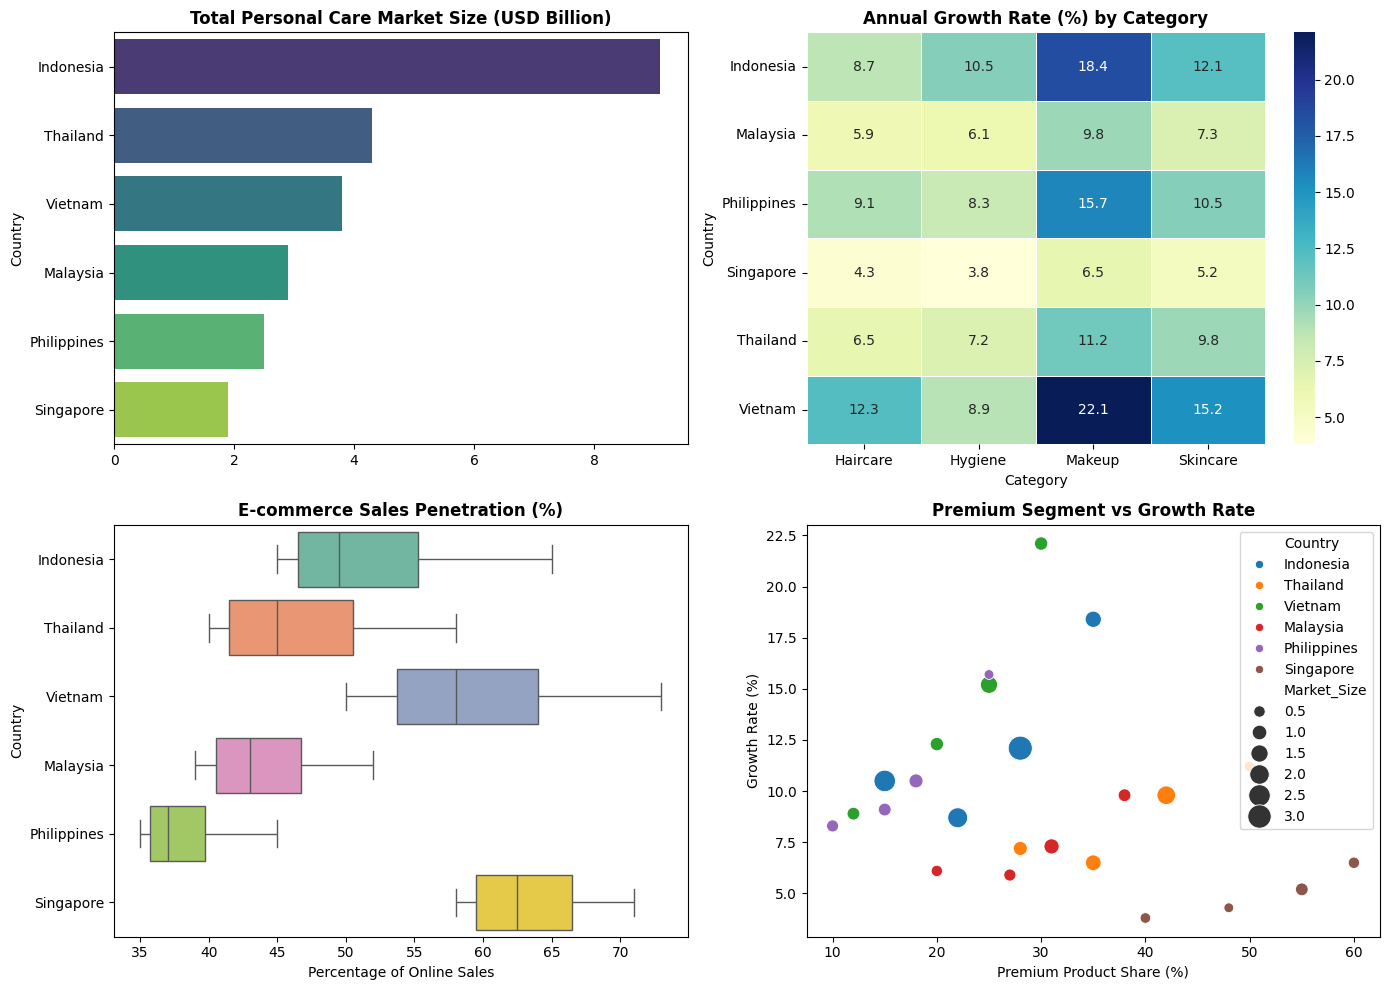

/tmp/ipython-input-3-4107537849.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Premium_Share', data=indo_df, palette='magma')


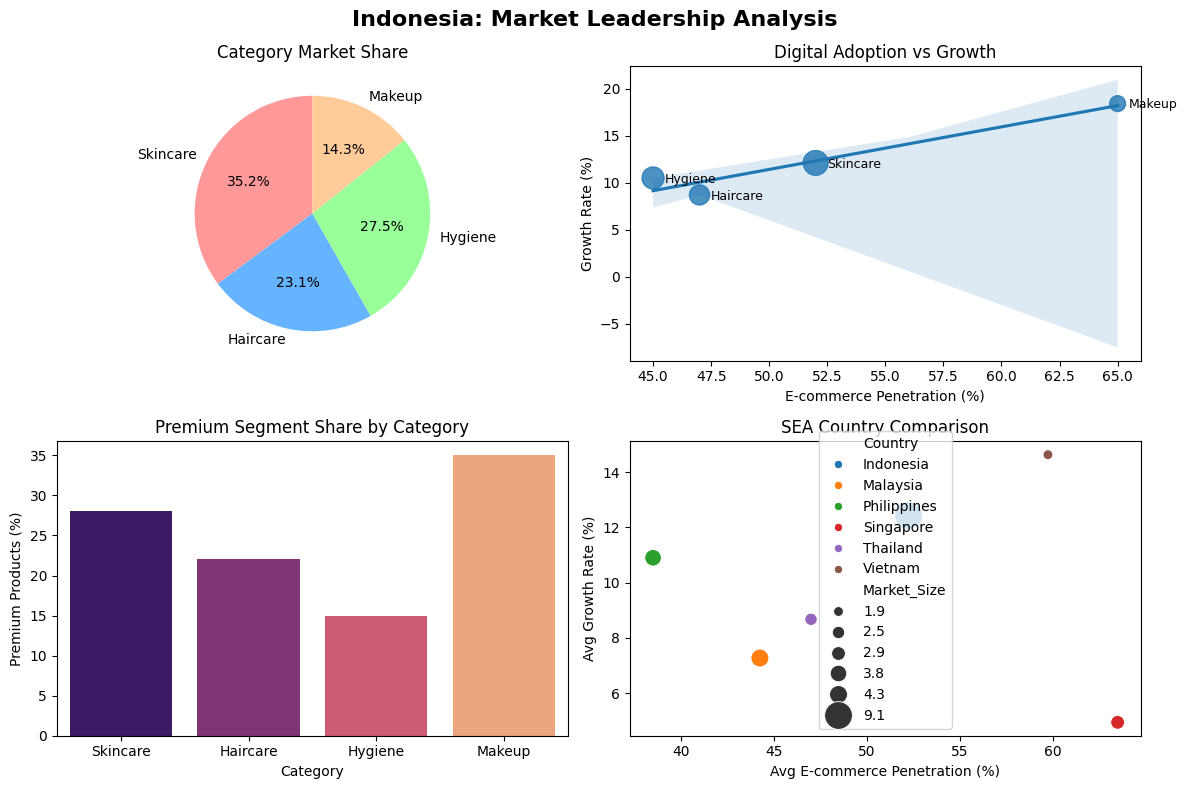

/tmp/ipython-input-3-4107537849.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Halal_Demand', y='Country', data=halal_df.sort_values('Halal_Demand', ascending=False),
/tmp/ipython-input-3-4107537849.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Eco_Conscious', y='Country', data=halal_df.sort_values('Eco_Conscious', ascending=False),


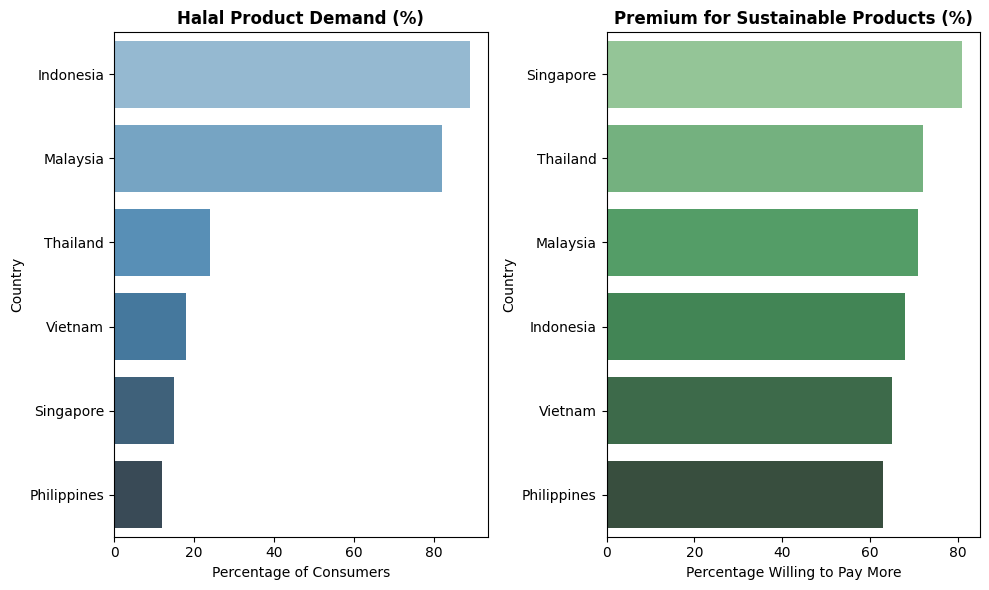

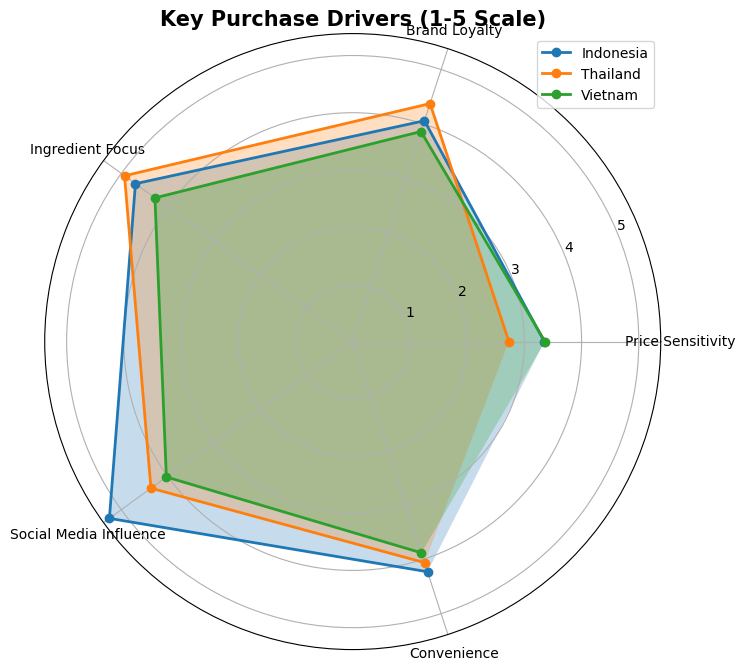

In [3]:
# Step 1: Setup and Data Import
!pip install seaborn squarify --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Synthetic dataset generation based on industry reports
countries = ['Indonesia', 'Thailand', 'Vietnam', 'Malaysia', 'Philippines', 'Singapore']
data = {
    'Country': countries * 4,
    'Category': (['Skincare']*6 + ['Haircare']*6 + ['Hygiene']*6 + ['Makeup']*6),
    'Market_Size': [
        # Skincare
        3.2, 1.8, 1.5, 1.1, 0.9, 0.7,
        # Haircare
        2.1, 1.2, 0.8, 0.6, 0.7, 0.3,
        # Hygiene
        2.5, 0.9, 0.7, 0.5, 0.6, 0.4,
        # Makeup
        1.3, 0.4, 0.8, 0.7, 0.3, 0.5
    ],
    'Growth_Rate': [
        # Skincare
        12.1, 9.8, 15.2, 7.3, 10.5, 5.2,
        # Haircare
        8.7, 6.5, 12.3, 5.9, 9.1, 4.3,
        # Hygiene
        10.5, 7.2, 8.9, 6.1, 8.3, 3.8,
        # Makeup
        18.4, 11.2, 22.1, 9.8, 15.7, 6.5
    ],
    'Ecommerce_Penetration': [
        # Skincare
        52, 48, 61, 45, 38, 65,
        # Haircare
        47, 42, 55, 41, 36, 60,
        # Hygiene
        45, 40, 50, 39, 35, 58,
        # Makeup
        65, 58, 73, 52, 45, 71
    ],
    'Premium_Share': [
        # Skincare
        28, 42, 25, 31, 18, 55,
        # Haircare
        22, 35, 20, 27, 15, 48,
        # Hygiene
        15, 28, 12, 20, 10, 40,
        # Makeup
        35, 50, 30, 38, 25, 60
    ]
}

df = pd.DataFrame(data)

# Step 2: Market Overview Visualization
plt.figure(figsize=(14, 10))

# Market Size by Country
plt.subplot(2, 2, 1)
country_totals = df.groupby('Country')['Market_Size'].sum().sort_values(ascending=False)
sns.barplot(x=country_totals.values, y=country_totals.index, palette='viridis')
plt.title('Total Personal Care Market Size (USD Billion)', fontweight='bold')
plt.xlabel('')

# Growth Rate Heatmap
plt.subplot(2, 2, 2)
growth_pivot = df.pivot_table(index='Country', columns='Category', values='Growth_Rate')
sns.heatmap(growth_pivot, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Annual Growth Rate (%) by Category', fontweight='bold')

# E-commerce Penetration
plt.subplot(2, 2, 3)
sns.boxplot(x='Ecommerce_Penetration', y='Country', data=df,
            palette='Set2', orient='h')
plt.title('E-commerce Sales Penetration (%)', fontweight='bold')
plt.xlabel('Percentage of Online Sales')

# Premium Segment Share
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Premium_Share', y='Growth_Rate',
                hue='Country', size='Market_Size', sizes=(50, 300))
plt.title('Premium Segment vs Growth Rate', fontweight='bold')
plt.xlabel('Premium Product Share (%)')
plt.ylabel('Growth Rate (%)')

plt.tight_layout()
plt.show()

# Step 3: Indonesia Deep Dive
indo_df = df[df['Country'] == 'Indonesia']

plt.figure(figsize=(12, 8))
plt.suptitle('Indonesia: Market Leadership Analysis', fontsize=16, fontweight='bold')

# Market Composition
plt.subplot(2, 2, 1)
plt.pie(indo_df['Market_Size'], labels=indo_df['Category'], autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=90)
plt.title('Category Market Share')

# Growth vs Digital Adoption
plt.subplot(2, 2, 2)
sns.regplot(x='Ecommerce_Penetration', y='Growth_Rate', data=indo_df,
            scatter_kws={'s': indo_df['Market_Size']*100})
for i, row in indo_df.iterrows():
    plt.text(row['Ecommerce_Penetration']+0.5, row['Growth_Rate']-0.5,
             row['Category'], fontsize=9)
plt.title('Digital Adoption vs Growth')
plt.xlabel('E-commerce Penetration (%)')
plt.ylabel('Growth Rate (%)')

# Premiumization Trend
plt.subplot(2, 2, 3)
sns.barplot(x='Category', y='Premium_Share', data=indo_df, palette='magma')
plt.title('Premium Segment Share by Category')
plt.ylabel('Premium Products (%)')

# Comparative Advantage
plt.subplot(2, 2, 4)
comparison = df.groupby('Country').agg({
    'Growth_Rate': 'mean',
    'Ecommerce_Penetration': 'mean',
    'Premium_Share': 'mean'
}).reset_index()
comparison['Market_Size'] = country_totals.values

sns.scatterplot(x='Ecommerce_Penetration', y='Growth_Rate', size='Market_Size',
                hue='Country', data=comparison, sizes=(50, 400))
plt.title('SEA Country Comparison')
plt.xlabel('Avg E-commerce Penetration (%)')
plt.ylabel('Avg Growth Rate (%)')

plt.tight_layout()
plt.show()

# Step 4: Trend Analysis - Halal and Sustainability
# Halal demand simulation
halal_data = {
    'Country': countries,
    'Halal_Demand': [89, 24, 18, 82, 12, 15],  # % consumers seeking halal personal care
    'Eco_Conscious': [68, 72, 65, 71, 63, 81]  # % willing to pay more for sustainable products
}
halal_df = pd.DataFrame(halal_data)

plt.figure(figsize=(10, 6))

# Halal Demand
plt.subplot(1, 2, 1)
sns.barplot(x='Halal_Demand', y='Country', data=halal_df.sort_values('Halal_Demand', ascending=False),
            palette='Blues_d')
plt.title('Halal Product Demand (%)', fontweight='bold')
plt.xlabel('Percentage of Consumers')

# Sustainability Premium
plt.subplot(1, 2, 2)
sns.barplot(x='Eco_Conscious', y='Country', data=halal_df.sort_values('Eco_Conscious', ascending=False),
            palette='Greens_d')
plt.title('Premium for Sustainable Products (%)', fontweight='bold')
plt.xlabel('Percentage Willing to Pay More')

plt.tight_layout()
plt.show()

# Step 5: Consumer Behavior Drivers
# Generate synthetic consumer survey data
np.random.seed(42)
factors = ['Price Sensitivity', 'Brand Loyalty', 'Ingredient Focus', 'Social Media Influence', 'Convenience']
indonesia = np.array([3.2, 4.1, 4.5, 4.8, 4.3]) + np.random.normal(0, 0.3, 5)
thailand = np.array([2.8, 3.9, 4.7, 4.5, 3.9]) + np.random.normal(0, 0.3, 5)
vietnam = np.array([3.5, 4.0, 4.2, 4.6, 4.4]) + np.random.normal(0, 0.3, 5)

# Radar Chart
angles = np.linspace(0, 2*np.pi, len(factors), endpoint=False).tolist()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, indonesia, 'o-', linewidth=2, label='Indonesia')
ax.fill(angles, indonesia, alpha=0.25)
ax.plot(angles, thailand, 'o-', linewidth=2, label='Thailand')
ax.fill(angles, thailand, alpha=0.25)
ax.plot(angles, vietnam, 'o-', linewidth=2, label='Vietnam')
ax.fill(angles, vietnam, alpha=0.25)

ax.set_thetagrids(np.degrees(angles), factors)
ax.set_title('Key Purchase Drivers (1-5 Scale)', fontweight='bold', size=15)
ax.legend(loc='upper right')
plt.show()

Market Dominance